# Open the CSV results and stack it in lists
<hr style="border:1px solid #0077b9;">

In [2]:
import csv
import numpy as np

def get_column_values(filename, column_name):
    """Read a CSV file and return values from a specific column as a list."""
    column_values = []
    
    with open(filename, mode='r') as file:
        reader = csv.DictReader(file)
        
        for row in reader:
            if column_name in row:
                column_values.append(row[column_name])
            else:
                print(f"Warning: Column '{column_name}' not found in CSV header.")
                return []
    
    return column_values

# Example usage:
filename = '../data/output/study_case_results.csv'  

median = get_column_values(filename, 'median')
median = [int(float(num)) for num in median]

obs_sos = get_column_values(filename, 'Obs_sos')
obs_sos = [int(float(num)) for num in obs_sos]

print(f"Values from column '{'median'}': {median}")
print(f"Values from column '{'obs_sos'}': {obs_sos}")

Values from column 'median': [90, 105, 30, 90, 31, 65, 55, 90, 55, 30, 30, 105, 65, 92, 89, 100, 55, 30, 105, 90, 65, 105, 65, 65, 65, 105, 105, 90, 30, 30, 65, 92, 90, 30, 65, 65, 65, 90, 65, 55]
Values from column 'obs_sos': [82, 119, 17, 91, 31, 76, 47, 85, 47, 34, 39, 122, 72, 92, 92, 87, 42, 30, 108, 83, 57, 98, 55, 56, 62, 106, 121, 94, 43, 27, 79, 92, 79, 43, 61, 69, 62, 86, 75, 47]


# Calculate the mean, median and std
<hr style="border:1px solid #0077b9;">

In [3]:
absolute_error = []
for i in range (len(median)):
   if (median[i] > obs_sos[i]):
      absolute_error = absolute_error + [median[i]-obs_sos[i]]
   else:
      absolute_error = absolute_error + [obs_sos[i]-median[i]]

print(f"Values from '{'absolute_error'}': {absolute_error}")
print(np.mean(absolute_error))
print(np.median(absolute_error))
print(np.std(absolute_error))

Values from 'absolute_error': [8, 14, 13, 1, 0, 11, 8, 5, 8, 4, 9, 17, 7, 0, 3, 13, 13, 0, 3, 7, 8, 7, 10, 9, 3, 1, 16, 4, 13, 3, 14, 0, 11, 13, 4, 4, 3, 4, 10, 8]
7.225
7.5
4.787940580249509


# Plot the absolute error from observed data (obs_sos) and calculated data
<hr style="border:1px solid #0077b9;">

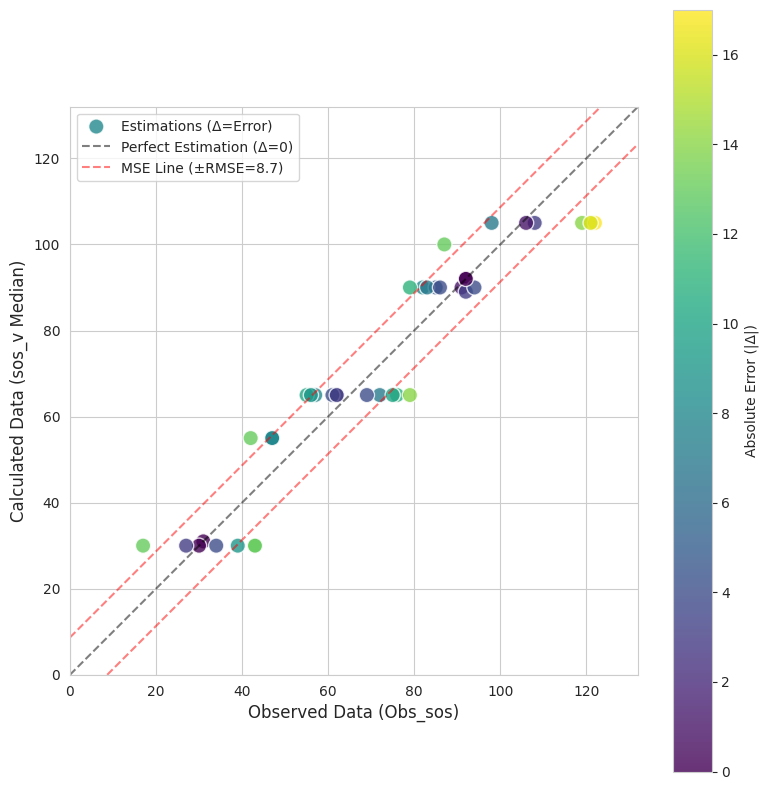

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate errors (Δ = Predicted - Observed)
errors = [round(m - o, 1) for m, o in zip(median, obs_sos)]

# Calculate MSE and RMSE
mse = mean_squared_error(obs_sos, median)
rmse = np.sqrt(mse)

# Create figure
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Scatter plot (color points by absolute error)
scatter = plt.scatter(obs_sos, median, c=np.abs(errors), cmap='viridis', 
                      s=120, edgecolor='white', alpha=0.8, 
                      label=f'Estimations (Δ=Error)')

# Add colorbar for error magnitude
cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Error (|Δ|)', fontsize=10)

# Perfect prediction line (y = x)
max_val = max(max(obs_sos), max(median)) + 10
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Perfect Estimation (Δ=0)')

# Add MSE lines (parallel to y=x)
plt.plot([0, max_val-rmse], [rmse, max_val], 'r--', alpha=0.5, 
         label=f'MSE Line (±RMSE={rmse:.1f})')
plt.plot([rmse, max_val], [0, max_val-rmse], 'r--', alpha=0.5)

# Customize plot
plt.xlabel('Observed Data (Obs_sos)', fontsize=12)
plt.ylabel('Calculated Data (sos_v Median)', fontsize=12)
plt.legend(loc='upper left')
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.gca().set_aspect('equal')  # Equal axes for correct diagonal

plt.tight_layout()
plt.show()